In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

# working with dates
from datetime import datetime

# for stats
from scipy import stats

import wrangle
import explore
import model

# Illinois Temperature Time Series Project

----
## Executive Summary

Goals:
- Identify trends in Illinois temperature data and build a model predicting future temperatures while reducing RMSE.

Key Findings:
- My best model was utilizing previous years data as a template for the future.
- This model reduced RMSE to 5 degrees. Less than 18% of other model's RMSE.

Takeaway:
- Illinois has very stable and consistent weather patterns year over year.

Recommendation:
- Gathering more data from earlier centuries will provide more insight to larger trends at play in this area such as global warming or global cooling.
- Identifying worldwide weather trends could explain the small variances in Illinois temperatures overtime. 
----

## 1. Planning

 - Create deliverables:
     - final_report.ipynb
 - Build functional wrangle.py and explore.py files
 - Acquire the data from Kaggle
 - Prepare and split the data via the wrangle.prepare functions
 - Explore the data utilizing time series manipulation and define hypothesis. Run the appropriate statistical tests in order to accept or reject each null hypothesis. Document findings and takeaways.
 - Create a baseline model predicting average temperature and documenting the RMSE.
 - Fit and train three (3) time series models to predict average temperature on the train dataset.
 - Evaluate the models by comparing the train and validation data.
 - Select the best model and evaluate it on the test data.
 - Develop and document all findings, takeaways, recommendations and next steps. 

----

## 2. Data Acquisition

In this step, I called my acquire function from wrangle.py. This function pulled in the state.csv that was previously downloaded from the kaggle url.

In [2]:
state = wrangle.acquire()

#### Data Dictionary

| Target | Type | Description |
| ---- | ---- | ---- |
| avg_temp | float | The average temperature for the month in degrees Farienheit |


| Feature | Type | Description |
| ---- | ---- | ---- |
| temp_uncertainty | float | The range of uncertainty of the temperature in degrees Farienheit |
| month | object | The month the temperature recorded occured |
| year | int | The year the tempeerature recorded occured |

#### Data Acquisition Takeaways
- The state csv has 645,675 observances and 5 features for 241 states.

----

## 3. Data Preparation
In this step, I called my prepare function from my wrangle.py file. This function:
- selected temperatures for Illinois
- handled nulls
- renamed columns
- reset the index to be the date
- converted temperatures into Farienheit
- filled in missing values
- created month and year features

In [3]:
state = wrangle.prepare(state)

In [4]:
train, val, test = wrangle.split_data(state)

In [5]:
state.shape, train.shape, val.shape, test.shape

((3238, 4), (1942, 4), (648, 4), (648, 4))

#### Data Preparation Takeaways
- When selecting for illinois data, we are left with 3238 observances over 4 features. 
- The 5th feature, date, became the index.
- Data was split into train, validate, and test with a 60/20/20 split.

----

## 4. Data Exploration

### Question 1. How is temperature averages changing over the years?

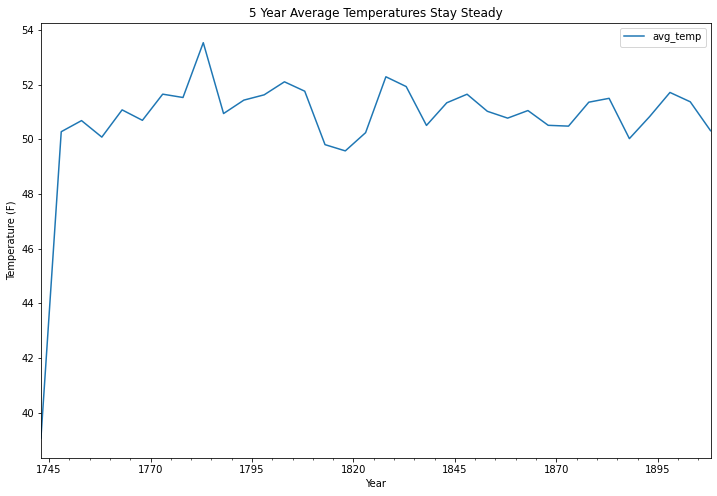

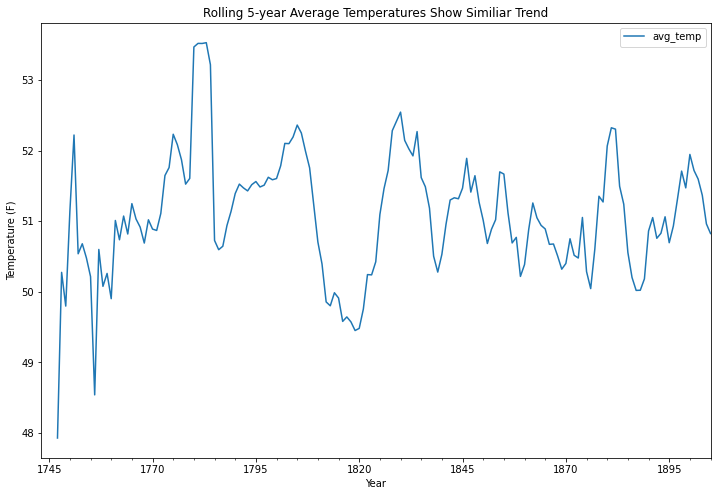

In [6]:
explore.get_q1_vis(train)

- Temperature has mostly stayed the same in the low 50s range

#### Hypothesis 1:
- Ho -> The average temperature before 1820 is the same as after 1820
- Ha -> The average temperature before 1820 is different than after 1820
- T-Test: Two-sample, Two-tail

In [7]:
explore.get_q1_stats(train)

Fail to reject the Null Hypothesis. Findings suggest the average temperature before 1820 is the same as after.


#### Question 1 Takeaways:
- The average temperature before 1820 is the same as after 1820.
- Temperatures remained consistent year to year.

----

### Question 2: How does uncertainty change over the years?

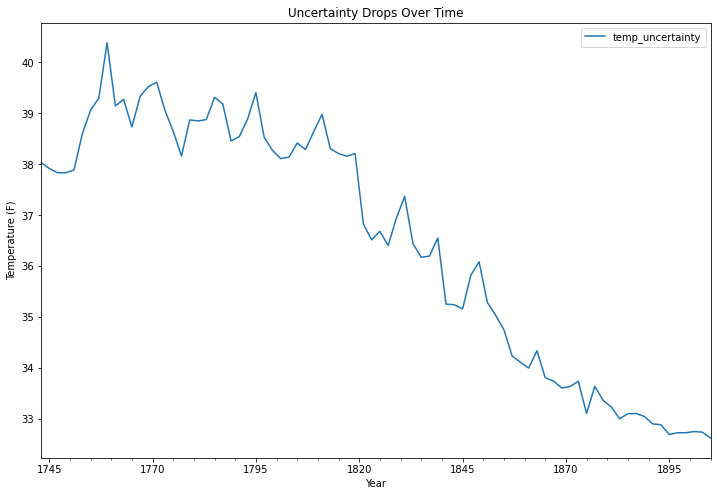

In [8]:
explore.get_q2_vis(train)

- Temperature uncertainty seems to continuously fall. Possibly due to increase in technology

#### Hypothesis 2:
- Ho -> The temperature uncertainty before 1820 is the same or lower as after 1820
- Ha -> The temperature uncertainty before 1820 is greater than after 1820
- T-Test: Two-sample, One-tail

In [9]:
explore.get_q2_stats(train)

Reject the Null Hypothesis. Findings suggest the temperature uncertainty before 1820 is higher than after.


#### Question 2 Takeaways:
- The temperature uncertainty before 1820 is higher than after 1820.
- This may be due to the rapid improvements in technology and weather tracking

----

### Question 3: Is there a seasonal cycle? Yearly? Quarterly?

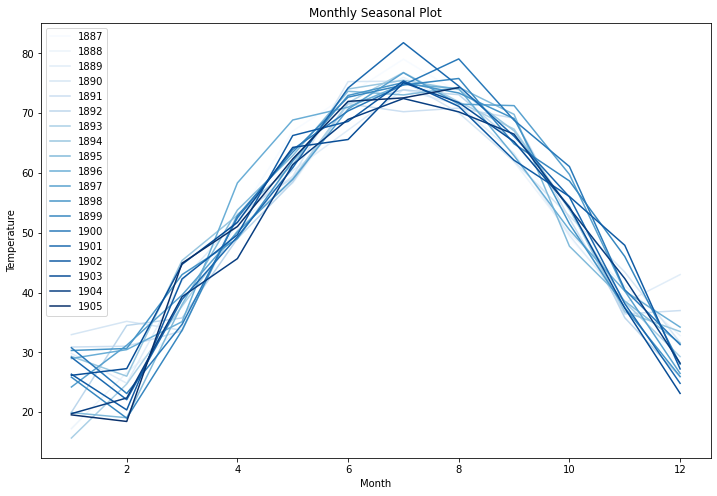

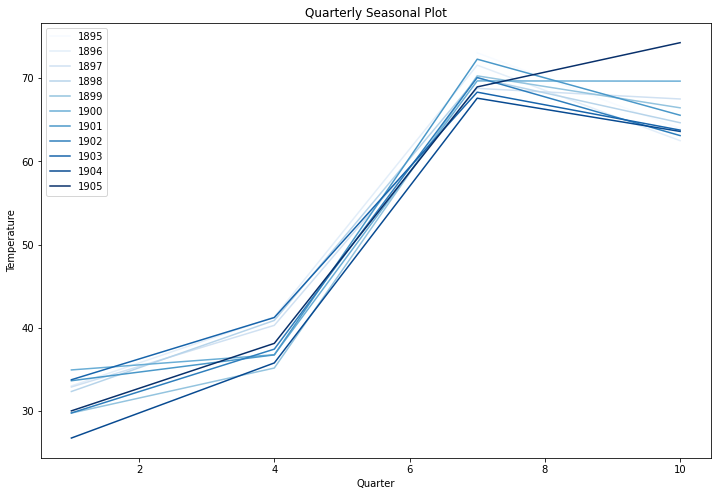

In [10]:
explore.get_q3_vis(train)

#### Question 3 Takeaways:
- There looks to be seasonality within year to year by the months
- There is consistency when spliting out the temperature into 3 month segments. This makes sense with the 4 seasons.

### Data Exploration Takeaways:
- The average temperature is the same before and after 1820
- The temperature uncertainty is greater before 1820
- There is minimal differences in monthly temperatures over the years
- There seems to be consistency in temperature season to season

----

## 5. Data Modeling

#### My goal is to minimize RMSE

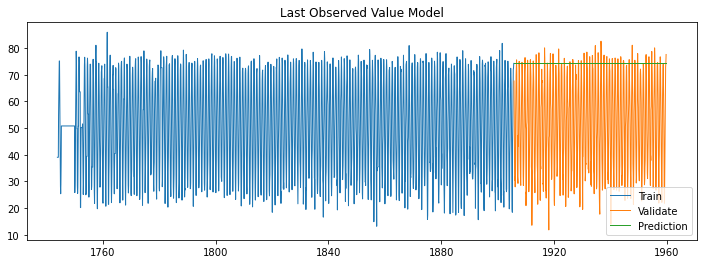

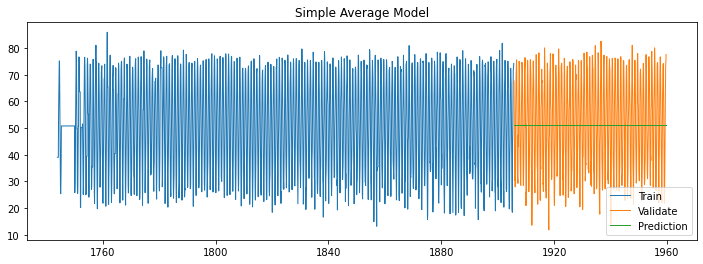

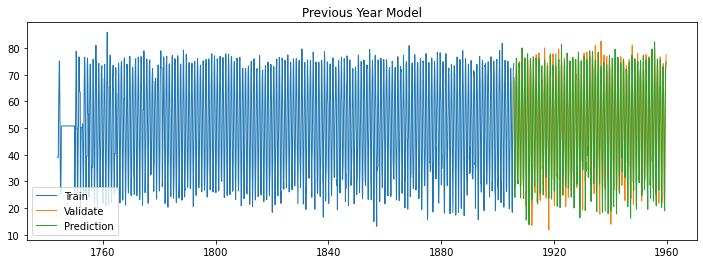

,model_type,target_var,rmse
0,last_observed_value,avg_temp,28.0
1,simple_average,avg_temp,18.0
2,previous_year,avg_temp,5.0


In [11]:
results = model.run_models(train, val)
results

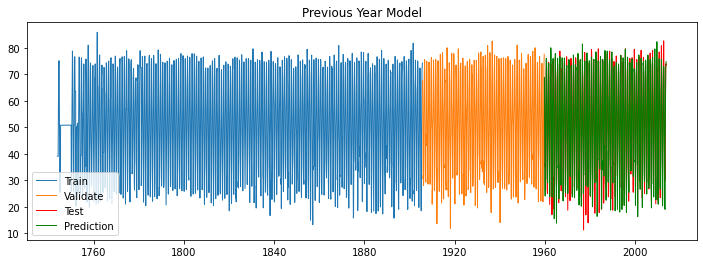

,model_type,target_var,rmse
0,test_resutls,avg_temp,5.0


In [12]:
model.run_best_model(train, val, test)

### Modeling Takeaways:
- Using the last value or a simple average does not capture the seasonality of temperature.
- The best model was using the previous years as the predictors for the model.
- The best model miminized rmse to 5 degrees

----

## Conclusion:

Illinois has seen very consistent temperature in the last few centuries. My best model to predict future temperature mimics the temperatures from previous years. This method minimized RMSE down to 5 degrees.

### Recommendations:
- Pending unforseen catastrophic events, things can continue as normal. The temperature in Illinois will maintain consistency with years previous.
- Gathering data from many centuries ago will show if there is a larger warming or cooling trend at play in this area. 

### Next Steps:
- With more time, I would begin looking at larger segments of seasonality besides year. Example: analyzing the effects of El Nino/El Nina
- I would also like to feature engineer more from the range of temperatures in each seasonality.